# What else is in an evolved name? Exploring Evolvable Specificity with SignalGP

In [18]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import spearmanr

In [19]:
data_dir = "../data/"
mape_data_fpath = os.path.join(data_dir, "mape.csv")
evo_dom_data_fpath = os.path.join(data_dir, "evo_dom.csv")

In [22]:
# Load data
mape_df = pd.read_csv(mape_data_fpath, dtype={"run_id":str,"agent_id":str,"update":int,"distraction_sigs":bool,"fitness":float,"fun_cnt":int,"fun_used":float,"inst_entropy":float,"sim_thresh":float})
evo_df = pd.read_csv(evo_dom_data_fpath, dtype={"run_id":str,"sim_thresh":float,"distraction_sigs":bool,"update":int,"fitness":float})

In [23]:
# evo_df = evo_df[evo_df["distraction_sigs"] == True]
# a = evo_df[evo_df["update"] == 10000]
# a87 = a[a["sim_thresh"] == 0.875] 
# a75 = a[a["sim_thresh"] == 0.75] 

In [24]:
# a87 = a87[a87["fitness"] == 256]
# a87

In [25]:
# a75 = a75[a75["fitness"] == 256]
# len(a75)

## MAP-Elites Visualization

In [26]:
# Organize data a bit
min_fitness = 256
# - Filter data by min fitness
mape_df = mape_df[mape_df["fitness"] >= min_fitness]
# - Separate by distraction signals vs. no distraction signals
mape_df_DS0 = mape_df[mape_df["distraction_sigs"] == False]
mape_df_DS1 = mape_df[mape_df["distraction_sigs"] == True]


In [27]:
# Set a few constants
min_sim_thresh = 0.0
max_sim_thresh = 1.0
min_fun_used = 0
max_fun_used = 32

xy_label_fs = 18
xy_tick_fs = 14

cmap = sns.cubehelix_palette(as_cmap=True)

### The importance of inexactness

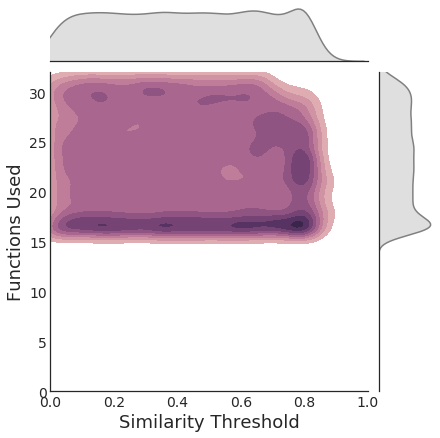

In [28]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=mape_df_DS0, x="sim_thresh", y="fun_used", kind="kde",
                      xlim=(min_sim_thresh, max_sim_thresh), ylim=(min_fun_used, max_fun_used),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Similarity Threshold", "Functions Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
plt.savefig("mape_DS0.png", bbox_inches='tight')
plt.savefig("mape_DS0.pdf", format='pdf', bbox_inches='tight')

### The value of not listening

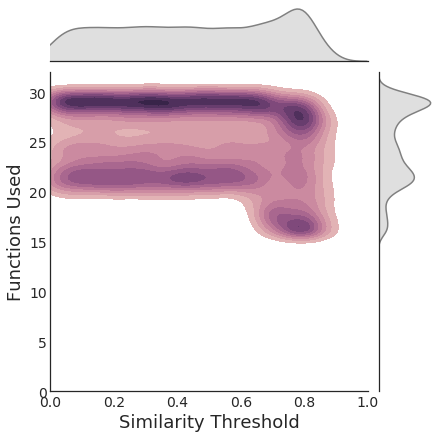

In [29]:
fig = plt.figure(1)
fig.set_size_inches(7,7)
with sns.axes_style("white"):
    g = sns.jointplot(data=mape_df_DS1, x="sim_thresh", y="fun_used", kind="kde",
                      xlim=(min_sim_thresh, max_sim_thresh), ylim=(min_fun_used, max_fun_used),
                      stat_func=None, shade=True, cmap=cmap, shade_lowest=False, color="Grey")
    g.set_axis_labels("Similarity Threshold", "Functions Used")

    ax = g.ax_joint
    ax.xaxis.label.set_fontsize(xy_label_fs)
    ax.yaxis.label.set_fontsize(xy_label_fs)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(xy_tick_fs)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(xy_tick_fs)
plt.savefig("mape_DS1.png", bbox_inches='tight')
plt.savefig("mape_DS1.pdf", format='pdf', bbox_inches='tight')

## Dominant performance during evolution run

In [30]:
# Organize data a bit
# - Separate by distraction signals vs. no distraction signals
evo_df_DS0 = evo_df[evo_df["distraction_sigs"] == False]
evo_df_DS1 = evo_df[evo_df["distraction_sigs"] == True]

In [31]:
# Some constants
labels = ["0.0%", "12.5%", "25.0%", "37.5%", "50.0%", "62.5%", "75.0%", "87.5%", "100.0%"]

min_sim_thresh = 0.0
max_sim_thresh = 1.0

min_fitness = 0.0
max_fitness = 256.0

x_tick_fs = 18
y_tick_fs = 18
y_label_fs = 24
x_label_fs = 24

### Importance of inexactness

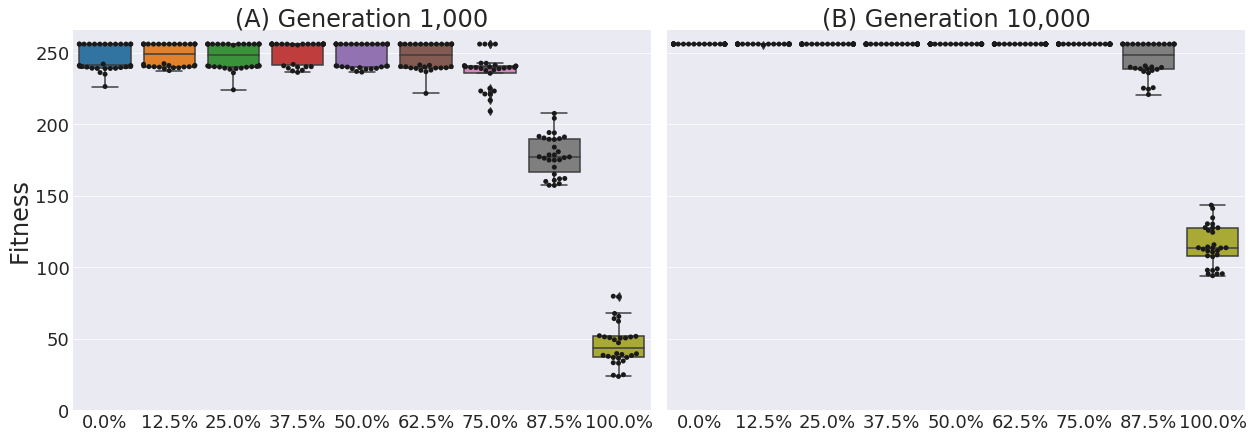

In [32]:
fig = plt.figure(1)
gridspec.GridSpec(1,12)
fig.set_size_inches(21, 7)

with sns.axes_style("darkgrid"):
    ax1 = plt.subplot2grid((1,12), (0,0), colspan=6)
    p1 = sns.boxplot(x="sim_thresh", y="fitness", data=evo_df_DS0[evo_df_DS0["update"] == 1000], ax=ax1)
    sns.swarmplot(x="sim_thresh", y="fitness", data=evo_df_DS0[evo_df_DS0["update"] == 1000], ax=ax1, color=".1")

    ax1.set_xticklabels(labels)
    ax1.set_xlabel("(A) Generation 1,000")

    ax1.set_ylabel("Fitness")
    ax1.set_ylim(min_fitness, max_fitness + 10)

    for tick in ax1.get_yticklabels():
        tick.set_fontsize(y_tick_fs)

    for tick in ax1.get_xticklabels():
        tick.set_fontsize(x_tick_fs)

    ax1.yaxis.label.set_fontsize(y_label_fs)
    ax1.xaxis.label.set_fontsize(x_label_fs)
    ax1.xaxis.set_label_position('top')


    ax2 = plt.subplot2grid((1,12), (0,6), colspan=6)
    p2 = sns.boxplot(x="sim_thresh", y="fitness", data=evo_df_DS0[evo_df_DS0["update"] == 10000], ax=ax2)
    sns.swarmplot(x="sim_thresh", y="fitness", data=evo_df_DS0[evo_df_DS0["update"] == 10000], ax=ax2, color=".1")
    ax2.set_xticklabels(labels)
    ax2.set_xlabel("(B) Generation 10,000")

    ax2.set_ylabel("")
    plt.setp(ax2.get_yticklabels(), visible = False)

    ax2.set_ylim(min_fitness, max_fitness + 10)

    for tick in ax2.get_yticklabels():
        tick.set_fontsize(y_tick_fs)

    for tick in ax2.get_xticklabels():
        tick.set_fontsize(x_tick_fs)

    ax2.yaxis.label.set_fontsize(y_label_fs)
    ax2.xaxis.label.set_fontsize(x_label_fs)
    ax2.xaxis.set_label_position('top')

plt.savefig("evo_dom_DS0.png", bbox_inches='tight')
plt.savefig("evo_dom_DS0.pdf", format='pdf', bbox_inches='tight')

### Value of not listening

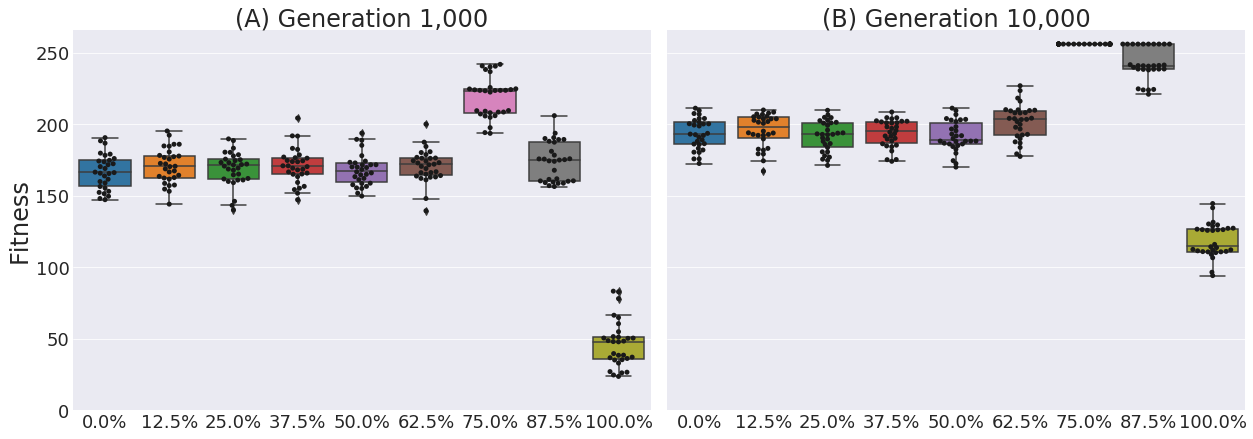

In [33]:
fig = plt.figure(1)
gridspec.GridSpec(1,12)
fig.set_size_inches(21, 7)

with sns.axes_style("darkgrid"):
    ax1 = plt.subplot2grid((1,12), (0,0), colspan=6)
    p1 = sns.boxplot(x="sim_thresh", y="fitness", data=evo_df_DS1[evo_df_DS1["update"] == 1000], ax=ax1)
    sns.swarmplot(x="sim_thresh", y="fitness", data=evo_df_DS1[evo_df_DS1["update"] == 1000], ax=ax1, color=".1")

    ax1.set_xticklabels(labels)
    ax1.set_xlabel("(A) Generation 1,000")

    ax1.set_ylabel("Fitness")
    ax1.set_ylim(min_fitness, max_fitness + 10)

    for tick in ax1.get_yticklabels():
        tick.set_fontsize(y_tick_fs)

    for tick in ax1.get_xticklabels():
        tick.set_fontsize(x_tick_fs)

    ax1.yaxis.label.set_fontsize(y_label_fs)
    ax1.xaxis.label.set_fontsize(x_label_fs)
    ax1.xaxis.set_label_position('top')


    ax2 = plt.subplot2grid((1,12), (0,6), colspan=6)
    p2 = sns.boxplot(x="sim_thresh", y="fitness", data=evo_df_DS1[evo_df_DS1["update"] == 10000], ax=ax2)
    sns.swarmplot(x="sim_thresh", y="fitness", data=evo_df_DS1[evo_df_DS1["update"] == 10000], ax=ax2, color=".1")
    ax2.set_xticklabels(labels)
    ax2.set_xlabel("(B) Generation 10,000")

    ax2.set_ylabel("")
    plt.setp(ax2.get_yticklabels(), visible = False)

    ax2.set_ylim(min_fitness, max_fitness + 10)

    for tick in ax2.get_yticklabels():
        tick.set_fontsize(y_tick_fs)

    for tick in ax2.get_xticklabels():
        tick.set_fontsize(x_tick_fs)

    ax2.yaxis.label.set_fontsize(y_label_fs)
    ax2.xaxis.label.set_fontsize(x_label_fs)
    ax2.xaxis.set_label_position('top')

plt.savefig("evo_dom_DS1.png", bbox_inches='tight')
plt.savefig("evo_dom_DS1.pdf", format='pdf', bbox_inches='tight')